In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

In [3]:
import pandas as pd
df_merged = pd.read_csv('/content/exchange_sun.csv')

In [7]:
df_merged.columns

Index(['Unnamed: 0', 'TIME', '원/달러환율', '한국 외환 보유액', '미국 외환 보유액', '한국 기준 금리',
       '미국 기준 금리', '전체 수출 총액', '미국 수출 총액', '중국 수출 총액', '전체 수입 총액', '미국 수입 총액',
       '중국 수입 총액', '소득 교역 조건 지수', '외국인 투자 금액', '한국 경상수지', '미국 경상수지', '한국 상품수지',
       '미국 상품수지', '한국 경제성장률', '미국 경제성장률', '경제 심리 지수', '소비자동향지수', '뉴스심리지수',
       '기대인플레이션율'],
      dtype='object')

| 번호 | 가설 내용 | 관련 변수 | 확인 방식 | 시각화 방법 | 주요 인사이트 |
|------|-----------|-----------|------------|--------------|----------------|
| 1 | 경제심리지수가 낮을수록 원/달러 환율은 상승한다 | 경제심리지수, 환율 | 시계열 비교 / 상관관계 분석 | Lineplot / Correlation Matrix | **음의 상관관계** (r ≈ -0.56) / 위기 시 급락-급등 패턴 |
| 2 | 외환보유액이 높을수록 원/달러 환율은 하락한다 | 외환보유액, 환율 | 시계열 비교 / 산점도 분석 | Lineplot / Scatterplot | **양의 상관관계** (r ≈ 0.45), 반대 움직임 구간 존재 |
| 3 | 기대인플레이션율이 상승하면 환율도 상승할 수 있다 | 기대인플레이션율, 환율 | 시계열 비교 / 이동평균 분석 | Lineplot (정규화 시계열) | 일정 부분 유사한 흐름 보이지만 비선형 특성 존재 |
| 4 | 경제심리지수가 낮아질수록 외국인 투자금액은 감소할 것이다 | 경제심리지수, 외국인 투자 | 이중축 시계열 / 구간별 비교 | Dual-axis Lineplot | 위기시(2008, 2020) 동반 하락 / 그러나 최근(2023) 예외적 흐름 |
| 5 | 외환보유액과 외국인 투자금액은 양의 상관관계를 보인다 | 외환보유액, 외국인 투자 | 상관분석 / 산점도 | Scatterplot + 회귀선 | **높은 양의 상관계수** (r ≈ 0.77), 정책적 외자 유입 영향 |
| 6 | 팬데믹 이후 주요 지표의 구조적 변화가 발생했다 | 환율, 외환보유액, 경제심리지수 | 팬데믹 전후 평균 비교 | Barplot (subplot 구성) | 팬데믹 이후 **환율 상승**, **심리지수 하락**, **외환보유액 증가** 확인 |
| 7 | 정책 이벤트 시점은 심리지수에 영향 준다 | 경제심리지수 | 주요 이슈 라벨링 시계열 | Annotated Lineplot | 글로벌 위기·금리 급등 등과 **심리지수 급락** 연계 확인 |


# 환율의 중요성과 변동성

**환율은** 수출입, 외국인 투자, 물가 등 **국가 경제 전반에 영향**을 주는 핵심 변수.

최근 몇 년간 **환율이 1,400원을 돌파**하는 등 큰 변동을 보임 → 이를 **설명할 수 있는 요인**을 분석.

► 그중에서도 경제 심리지수(국민의 체감 경기)와 외환보유액(국가의 대외 지급 여력)를 반영하여 분석

## 원/달러환율 vs 외환보유액 vs 경제심리지수

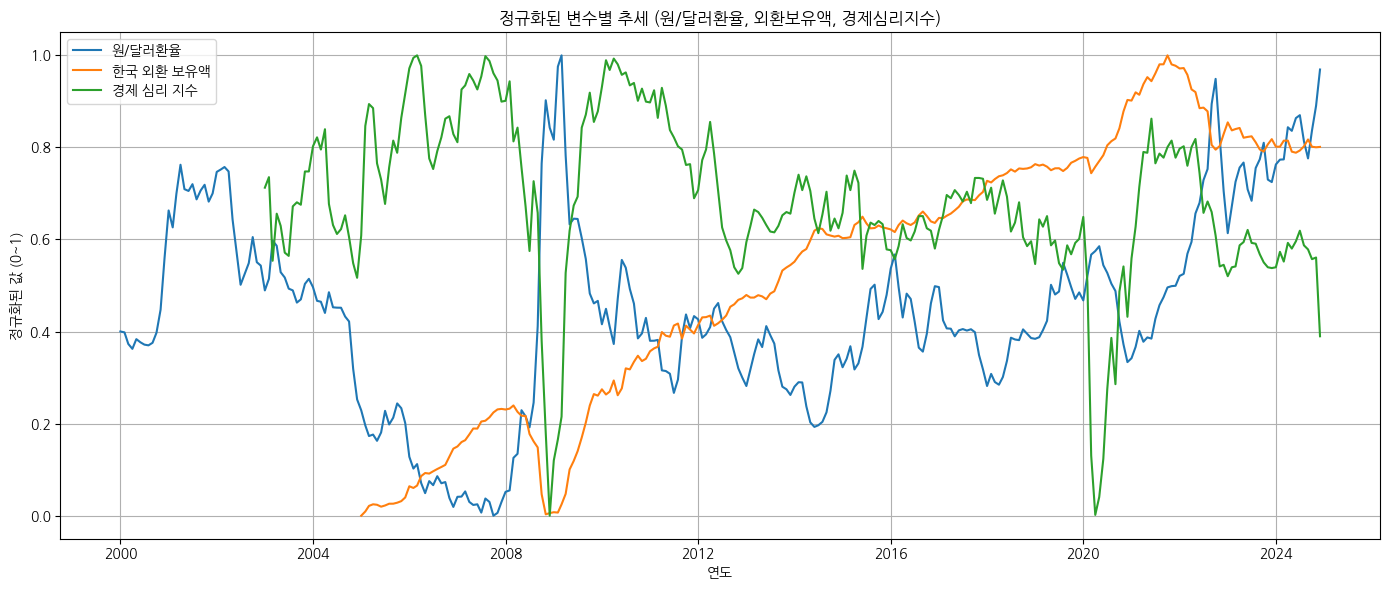

In [4]:
# 날짜 열을 datetime 형식으로 변환
df_merged["TIME"] = pd.to_datetime(df_merged["TIME"])

# 정규화 전용 복사본 생성
df_plot = df_merged[["TIME", "원/달러환율", "한국 외환 보유액", "경제 심리 지수"]].copy()

# 정규화 (0~1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_plot.iloc[:, 1:] = scaler.fit_transform(df_plot.iloc[:, 1:])

# TIME을 인덱스로 설정
df_plot.set_index("TIME", inplace=True)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df_plot.index, df_plot["원/달러환율"], label="원/달러환율")
plt.plot(df_plot.index, df_plot["한국 외환 보유액"], label="한국 외환 보유액")
plt.plot(df_plot.index, df_plot["경제 심리 지수"], label="경제 심리 지수")
plt.legend()
plt.title("정규화된 변수별 추세 (원/달러환율, 외환보유액, 경제심리지수)")
plt.xlabel("연도")
plt.ylabel("정규화된 값 (0~1)")
plt.grid(True)
plt.tight_layout()
plt.show()

- 2000~2007: 환율 안정 + 외환보유액 증가 + 심리지수 상승

- 2008~2009: 글로벌 금융위기 (서브프라임 모기지)

  - 환율 급등 (원화 가치 폭락) → 1,100원대 → 1,500원대까지 급등

  - 외환보유액 일시적 급감 → 원화 방어 위해 외환시장에 달러 공급

  - 경제심리지수 급락 → 금융 불안, 실물경제 침체 우려 급증

- 2010~2014: 회복기

  - 환율 하락 (원화 강세 회복) → 외환보유액 다시 상승세

  - 경제 심리지수도 개선 → 세계 경기 회복 + 삼성전자 등 수출 호조

  - 2013~14: 미국 테이퍼링 언급 → 신흥국 불안 → 약간의 변동은 있지만 한국은 외환 안정 유지

- 2015~2019: 안정기 & 미중무역전쟁

  - 환율은 비교적 안정적 흐름

  - 외환보유액은 계속 증가 → 한국은행의 지속적 보유 전략

  - 경제심리지수는 점차 하락세
  
    → 내수 둔화, 청년 실업, 저성장 우려
    
    → 2018년 미중 무역전쟁 여파로 대외 불확실성 확대


- 2020~2021: 코로나19 충격

  - 환율 급등 (2020 초반) → 글로벌 달러 수요 폭증

  - 경제 심리지수 급락 후 반등 → 팬데믹 공포 → 정부 부양책 발표 → 회복 기대감

  - 외환보유액은 방어적으로 유지

- 2022~2023: 고금리·고환율 시대

  - 환율 급등 → 미국 기준금리 급격한 인상으로 달러 강세

  - 외환보유액 감소 → 원화 방어 위해 달러 매도한 흔적

  - 경제 심리지수 하락 → 고물가 + 경기침체 우려 → 소비·투자 둔화

- 2024: 최근

  - 환율은 다시 상승세 → 긴축 종료 이후에도 고환율 지속

  - 외환보유액은 보합 혹은 소폭 감소

  - 경제 심리지수도 둔화 중 → 금리 인하 기대와 경기 불확실성 혼재

► 경제심리지수는 환율보다 **선행적으로 움직이는 경향**
→ **소비자·기업의 기대가 먼저 변화**

## **[가설 1] 경제심리지수가 낮을수록 원/달러 환율은 상승한다.**

In [5]:
correlation = df_merged[["원/달러환율", "경제 심리 지수"]].corr().iloc[0, 1]
print(f"경제심리지수와 원/달러 환율의 상관계수: {correlation:.3f}")

경제심리지수와 원/달러 환율의 상관계수: -0.562


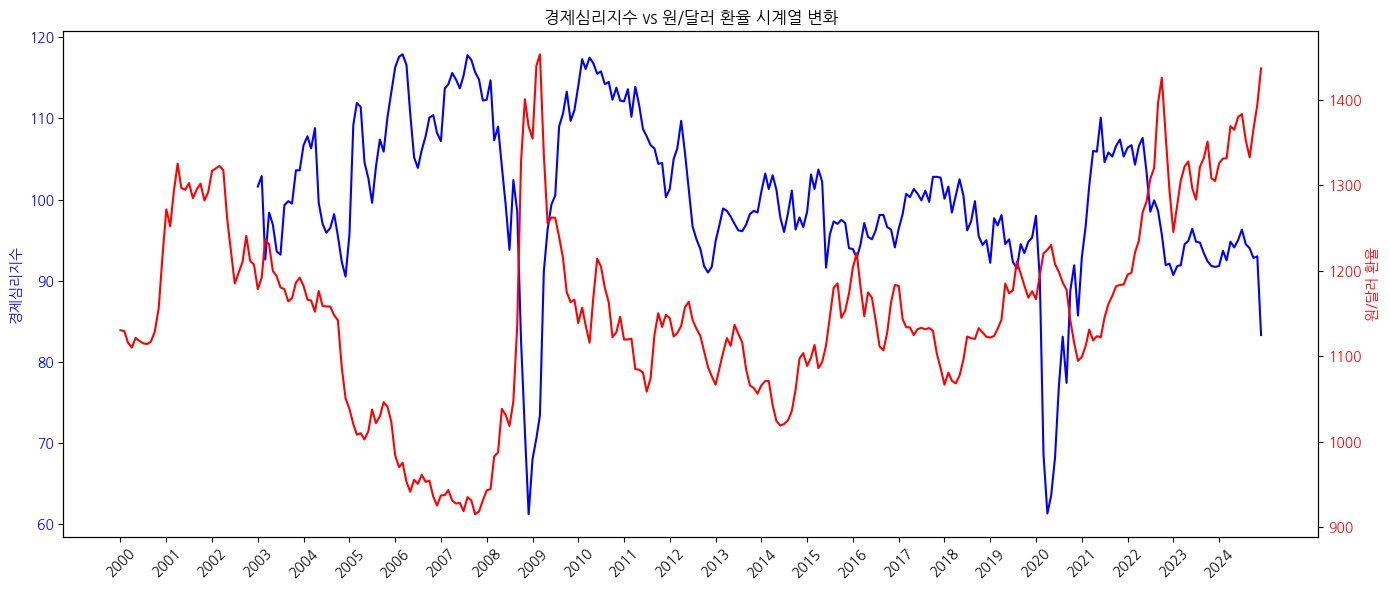

In [ ]:
import matplotlib.pyplot as plt

# 'TIME'을 datetime으로 변환 (필요 시)
df_plot = df_merged.copy()
df_plot = df_plot.reset_index()  # TIME이 index에 있을 수도 있으므로 컬럼으로 옮김
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))  # Period → datetime 변환
df_plot["연도"] = df_plot["TIME"].dt.year

# 연도별 첫 번째 날짜만 사용해 x축 눈금 위치 설정
year_ticks = df_plot.groupby("연도")["TIME"].first().values
year_labels = df_plot["연도"].unique()

# 시각화
plt.figure(figsize=(14, 6))

# 축 1: 경제심리지수
ax1 = plt.gca()
ax1.plot(df_plot["TIME"], df_plot["경제 심리 지수"], color="blue", label="경제심리지수")
ax1.set_ylabel("경제심리지수", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 축 2: 환율
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], color="red", label="원/달러 환율")
ax2.set_ylabel("원/달러 환율", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# x축 연도만 출력
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(year_labels, rotation=45)

plt.title("경제심리지수 vs 원/달러 환율 시계열 변화")
plt.tight_layout()
plt.show()

| 연도       | 주요 이벤트                     | 경제심리지수 반응      | 원/달러 환율 반응         |
|------------|----------------------------------|-------------------------|----------------------------|
| **2001**   | 9·11 테러                        | 급격한 심리 하락       | 환율 상승 (원화 약세)      |
| **2008~09**| 글로벌 금융위기                  | 급락                    | 급등 (1500원대 접근)       |
| **2010~12**| 유럽 재정위기                    | 불안정                  | 등락 (1100~1200원 사이)    |
| **2015~16**| 위안화 절하, 브렉시트(영국 유럽연합 탈퇴)           | 심리 약화               | 상승 (불안 심화)           |
| **2020**   | 코로나 팬데믹                    | 급락                    | 급등 (위기 시 원화 약세)   |
| **2022~23**| 美 기준금리 급등 (연준 긴축)     | 심리 위축 지속          | 1400원 돌파 (환율 급등)     |
| **2024**   | 긴축 완화 기대, 환율 안정 기조   | 반등 시도               | 완만한 하락세              |


 - 2022~2023년 미국 기준금리 급등 확인

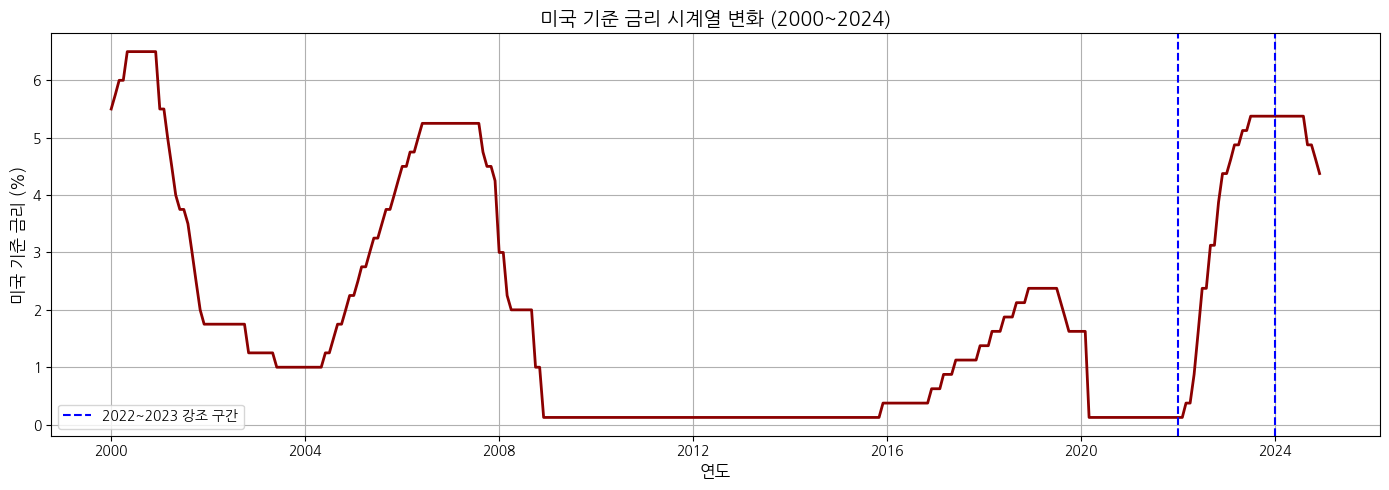

In [6]:
import matplotlib.pyplot as plt

# 시계열 시각화용 복사본
df_plot = df_merged.copy()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"])

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_plot["TIME"], df_plot["미국 기준 금리"], color='darkred', linewidth=2)

# 강조: 2022년과 2023년 구간 세로선 추가
plt.axvline(pd.Timestamp("2022-01-01"), color='blue', linestyle='--', linewidth=1.5, label='2022~2023 강조 구간')
plt.axvline(pd.Timestamp("2023-12-31"), color='blue', linestyle='--', linewidth=1.5)

# 꾸미기
plt.title("미국 기준 금리 시계열 변화 (2000~2024)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("미국 기준 금리 (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **[가설 1] 결론**

  - 경제심리지수와 원/달러 환율은 강한 음의 상관관계를 가짐 (상관계수 ≈ -0.56).

  - 경제 불안 → 원화 약세 → 환율 상승이라는 반비례 관계가 시계열 전반에 걸쳐 관측됨.

  - 특히 2008년 글로벌 금융위기, 2020년 코로나 팬데믹 시기에 해당 경향이 가장 뚜렷하게 나타남.

  
► 분석 결과, 경제심리지수와 원/달러 환율 간에는 유의미한 음의 상관관계가 존재하며,

**경제에 대한 불안 심리가 고조될수록 환율이 상승(원화 약세)**하는 경향이 뚜렷하게 나타난다.


특히 2008년 글로벌 금융위기와 2020년 팬데믹 시기에는 경제심리지수의 급락과 함께 원/달러 환율이 급등하는 흐름이 명확히 관측되었으며,

이는 경제심리와 환율 간 반비례 관계의 대표적인 사례로 해석할 수 있다.

## **[가설 2] 경제심리지수가 낮아질수록 외국인투자금액은 감소할 것이다.**

In [ ]:
corr_1 = df_merged[["외국인 투자 금액", "경제 심리 지수"]].corr().iloc[0, 1]
print(f"외국인 투자 금액과 경제 심리지수 간 상관계수: {corr_1:.3f}")

외국인 투자 금액과 경제 심리지수 간 상관계수: -0.250


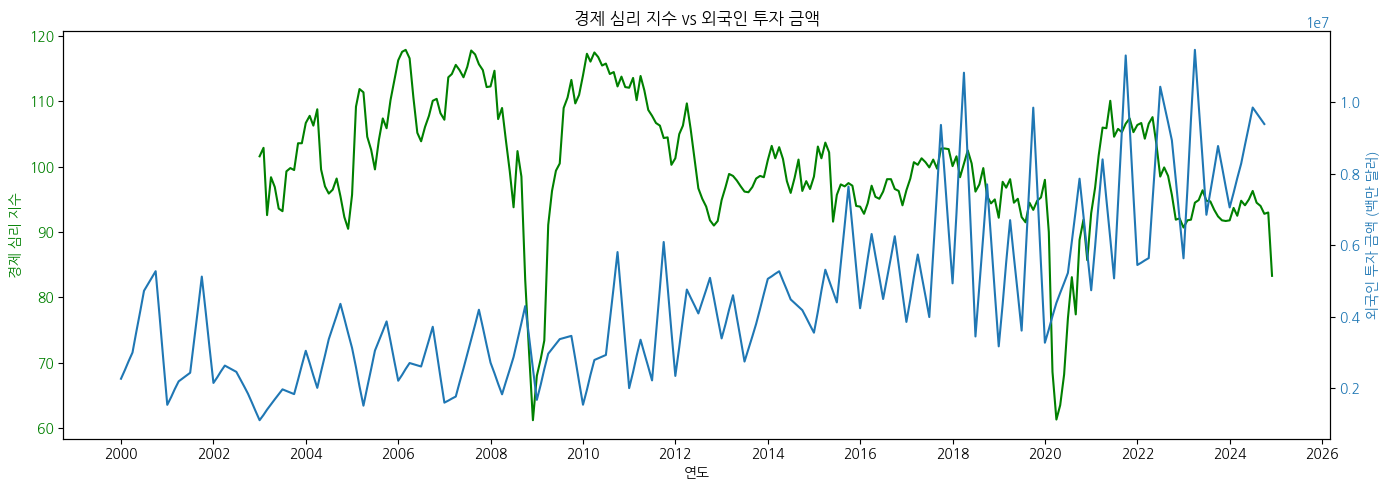

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 시간 형식 처리
df_merged["TIME"] = pd.to_datetime(df_merged["TIME"])

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 y축: 경제 심리 지수
color = "green"
ax1.set_xlabel("연도")
ax1.set_ylabel("경제 심리 지수", color=color)
ax1.plot(df_merged["TIME"], df_merged["경제 심리 지수"], color=color, label="경제 심리 지수")
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 y축: 외국인 투자 금액
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("외국인 투자 금액 (백만 달러)", color=color)
ax2.plot(df_merged["TIME"], df_merged["외국인 투자 금액"], color=color, label="외국인 투자 금액")
ax2.tick_params(axis='y', labelcolor=color)

# 연도 단위 x축 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(2))  # 2년 간격
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 제목 및 레이아웃
plt.title("경제 심리 지수 vs 외국인 투자 금액")
fig.tight_layout()
plt.show()

| 구간        | 경제심리지수 | 외국인투자금액 | 특징                             |
|-------------|----------------|------------------|----------------------------------|
| 2000~2007   | 상승           | 유지/증가         | 안정 성장기                       |
| 2008        | 급락           | 급감              | 글로벌 금융위기 충격              |
| 2010~2015   | 회복세         | 증가              | 외자 유입 회복                   |
| 2018 이후   | 하락           | 변동 중 증가       | 미중 무역, 코로나, 고금리 혼재     |
| 2022~2024   | 지속 하락       | 증가              | 실물심리 악화 vs 자본 유입        |


* 2022-2023년의 경우

  경기 체감은 악화되었지만,

  고금리 환경과 환차익 기대 등으로 외국인 자금은 유입되는 모습.

  심리가 실제 자금 흐름과 꼭 일치하지는 않음을 보여줌.


* 특히 , 고금리/환율 이슈가 외자 유입을 자극하는 경우, 심리와 반대 흐름도 가능

  - 고금리 상황:

    한국이 기준금리를 높이면, 금리 차익을 노리는 외국인 투자자들이 자금을 한국에 투자하려고 함.
  → 외국인 투자금액 증가

  - 환율 상승(원화 약세):

    달러 대비 원화 가치가 떨어지면, 외국인 입장에서는 상대적으로 싸게 투자할 수 있는 기회.

### **[가설 2] 결론**

- 일반적인 흐름은 맞음. 경제 불확실성이 크면 외국인 투자자는 빠져나가는 경향이 있음.

- 하지만 금리차, 환율, 국가별 투자 매력도 등의 다른 요인이 더 강력하게 작용하는 시점도 있음.

- 특히 2022~2023년: 경기 체감은 악화됐지만 한국 금리 인상 + 환율 상승(원화 약세) → 외국인에게 매력적인 투자 환경 → 투자금 증가

- 즉, 경제심리지수만으로 설명하기 어려운 구간이 있음.

► 경제심리지수가 낮아질수록 외국인 투자금액이 줄어드는 경향은 있으나, 그 상관관계는 약하며 절대적이지 않다. 특히 금리차와 환율 등의 투자 수익률 요인이 더 중요하게 작용하는 시기(2022~2023년)에는 경제심리와 반대 흐름도 관측되었다. 따라서 외국인 자금 유입/이탈을 해석할 때에는 경제심리 외에도 금리, 환율 등과의 종합적인 고려가 필요하다.

## **[가설2-1] 한미 금리차가 커질수록 외국인 투자금액은 증가할 것이다.**

<Figure size 1400x600 with 0 Axes>

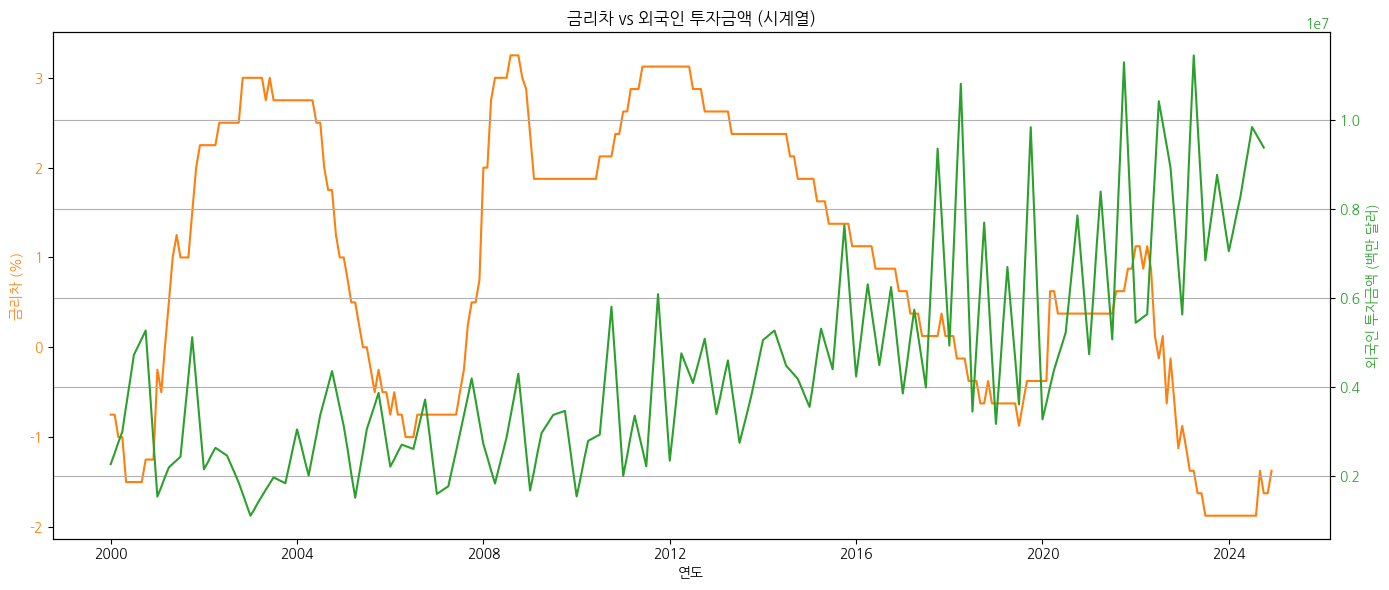

In [23]:
import matplotlib.pyplot as plt

# 금리차 계산
df_merged['금리차'] = df_merged['한국 기준 금리'] - df_merged['미국 기준 금리']

# 그래프 스타일 설정
plt.figure(figsize=(14, 6))
fig, ax1 = plt.subplots(figsize=(14, 6))

# 금리차 - 왼쪽 y축
color1 = 'tab:orange'
ax1.set_xlabel('연도')
ax1.set_ylabel('금리차 (%)', color=color1)
ax1.plot(df_merged['TIME'], df_merged['금리차'], color=color1, label='금리차')
ax1.tick_params(axis='y', labelcolor=color1)

# 외국인 투자금액 - 오른쪽 y축
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('외국인 투자금액 (백만 달러)', color=color2)
ax2.plot(df_merged['TIME'], df_merged['외국인 투자 금액'], color=color2, label='외국인 투자금액')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 그리드
plt.title('금리차 vs 외국인 투자금액 (시계열)')
fig.tight_layout()
plt.grid(True)
plt.show()


In [24]:
corr_1 = df_merged[["금리차", "외국인 투자 금액"]].corr().iloc[0, 1]
print(f"외국인 투자 금액과 금리차 간 상관계수: {corr_1:.3f}")

외국인 투자 금액과 금리차 간 상관계수: -0.475


### **[가설 2-1] 결론 2**

* 처음 가정: "경제심리가 나빠지면 외자 유입이 줄어들 것"

  → 데이터 상 부분적으로 타당

* 예외 발견: "심리 나쁜데도 외국인 투자가 늘어난 시기 존재 (2022~2023)"

  → 고금리/고환율의 수익 기회가 심리보다 더 큰 유인이 됨

* 가설 확장 필요성: "외국인 투자는 경제심리 외에도 금리차, 환율 등 구조적 변수의 영향을 동시에 받는다"

  → 그러나 금리차는 실제로도 외국인 투자를 설명하지 못했음 (오히려 상관관계는 음의 방향)

<br>
► 경제심리지수와 외국인 투자금액은 약한 음의 상관관계를 보이며, 일부 시기에는 심리 불안이 외자 이탈과 함께 발생했다.

그러나 전체적으로는 경제심리와 외국인 투자 사이의 직접적인 연관성은 약하며,

금리차와의 관계에서는 오히려 음의 상관관계가 나타나,

기존의 "금리차 확대 → 외자 유입" 가설과는 반대되는 흐름을 보였다.

이에 따라 외국인 자금 유입은 금리나 심리뿐만 아니라 다른 요인, 예컨대 환율 수준이나 글로벌 유동성 여건 등의 복합적 영향을 받을 수 있음을 시사한다.

## **[가설 2-2] 원/달러 환율이 상승하면 외국인 투자금액은 증가할 것이다.**

In [26]:
# 결측치 제거 후 상관계수 계산
subset = df_merged[["원/달러환율", "외국인 투자 금액"]].dropna()
correlation = subset.corr().iloc[0, 1]

print(f"외국인 투자 금액과 원/달러 환율 간의 상관계수: {correlation:.3f}")

외국인 투자 금액과 원/달러 환율 간의 상관계수: 0.344


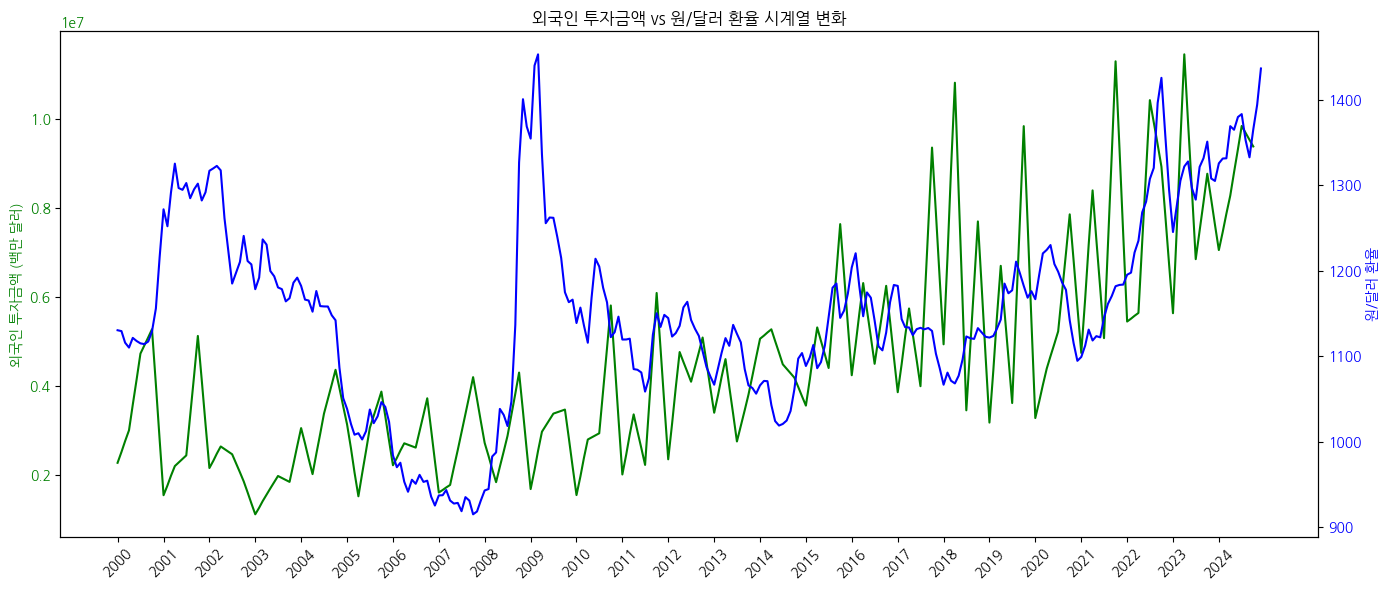

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 복사
df_plot = df_merged.copy()
df_plot = df_plot.reset_index()  # TIME이 index일 경우 대비

# TIME 컬럼을 datetime 형식으로 변환
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"])

# 연도 라벨 추출 (연도별 첫 날짜)
df_plot["연도"] = df_plot["TIME"].dt.year
year_ticks = df_plot.groupby("연도")["TIME"].first().values
year_labels = df_plot["연도"].unique()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 축 1: 외국인 투자금액
ax1.plot(df_plot["TIME"], df_plot["외국인 투자 금액"], color="green", label="외국인 투자금액")
ax1.set_ylabel("외국인 투자금액 (백만 달러)", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# 축 2: 원/달러 환율
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], color="blue", label="원/달러 환율")
ax2.set_ylabel("원/달러 환율", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# x축 연도 설정
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(year_labels, rotation=45)

# 제목 및 레이아웃
plt.title("외국인 투자금액 vs 원/달러 환율 시계열 변화")
plt.tight_layout()
plt.show()


- 2008~2009년 글로벌 금융위기: 환율 급등과 함께 외국인 투자금액도 증가하는 모습 → 안전자산 차익, 타이밍 투자의 가능성

- 2022~2024년 최근 구간: 환율이 높지만 외국인 투자금액은 뚜렷하게 감소하지 않음 → 환율이 투자 유인으로 작용했을 가능성

- 하지만 전체 구간에서 일관된 직선적 관계는 아님 -> 상관계수도 0.34

### **[가설 2-2] 결론**

- **상관계수 0.344** 로 약한 양의 상관관계 존재
- **고환율이 외국인 입장에서 '싸게 살 기회'**가 되어 투자금액 증가로 이어질 수 있음.
- 환율이 외국인 투자의 단일 결정요인은 아니지만, 일정 부분 영향은 있다


### ⭐️ **가설 2 전체 정리**

✔️ **[가설 2-0]**

**경제심리지수가 낮아질수록 외국인 투자금액은 감소할 것이다.**

- 상관계수: -0.250 → 약한 음의 상관관계

- 일부 구간에서 경제심리 하락에도 외국인 투자금액이 오히려 증가하는 구간 존재

- ▶️ 경제심리지수가 단독으로 외국인 투자 흐름을 설명하기에는 한계


✔️ **[가설 2-1]**

**한미 금리차가 커질수록 외국인 투자금액은 증가할 것이다.**

- 상관계수: -0.475 → 예상과 반대되는 음의 상관관계

- 금리차 가 큰 구간에서 오히려 외국인 투자금액은 감소 경향

- ▶️ 고금리 매력보다 환리스크, 경제 불안 요인이 더 크게 작용했을 가능성


✔️ **[가설 2-2]**

**환율이 상승하면 외국인 투자금액은 증가할 것이다.**

- 상관계수: +0.344 → 중간 정도의 양의 상관관계

- 고환율 구간에서 외국인 자금 유입 사례 존재

- ▶️ 환차익 기대 요인이 일정 부분 작용했음을 시사

<br>

► 경제심리의 악화는 외국인 투자 감소를 유발할 수도 있지만,
환율 상승에 따른 투자 매력, 기준금리 수준, 복합적인 정책/경제 요인이 더 큰 영향을 미친다.

고금리 + 고환율 구간에서 투자금액이 감소한 최근의 흐름은,
단순 기대효과 외에도 거시 경제 불안 요인이 투자 판단에 더 크게 작용했음을 알 수 있다.


## **[가설 3] 경제심리지수는 정책적 이벤트에 영향을 받는다.**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# TIME 컬럼을 datetime으로 변환 (필요 시)
df_plot = df_merged.copy()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))  # Period → datetime 변환

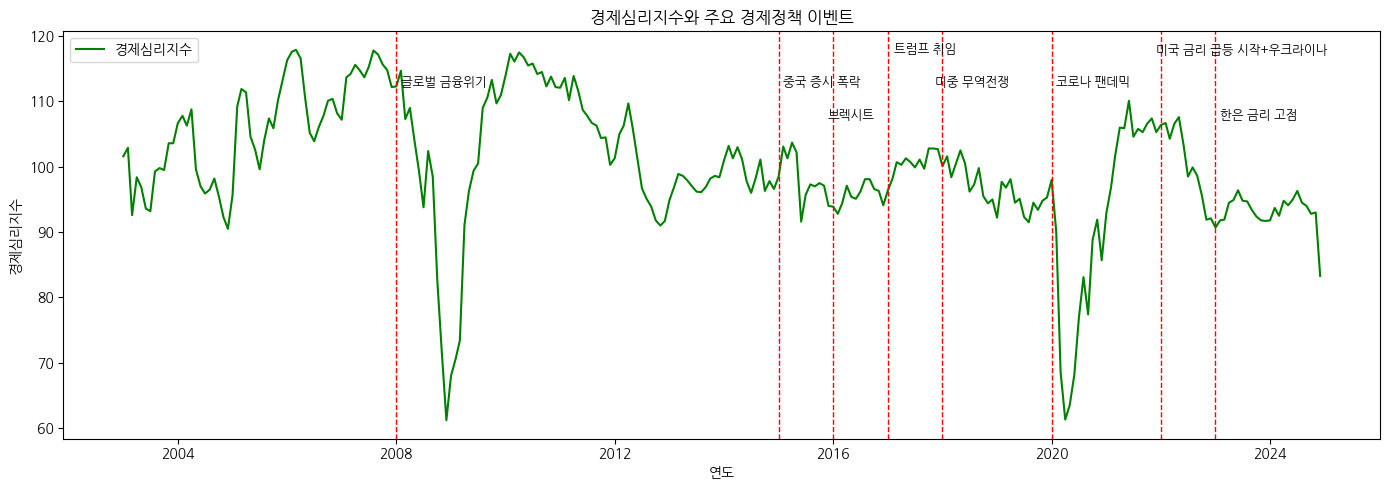

In [9]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_plot, x="TIME", y="경제 심리 지수", color="green", label="경제심리지수")
plt.title("경제심리지수와 주요 경제정책 이벤트")
plt.xlabel("연도")
plt.ylabel("경제심리지수")

# 주요 이벤트 추가
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "미국 금리 급등 시작+우크라이나",
    "2023": "한은 금리 고점"
}

# y축 기준점 설정
y_base = df_plot["경제 심리 지수"].max() - 5

# 라벨 위치 조정 사전 설정
label_offsets = {
    "2008": (30, 0),
    "2015": (30, 0),
    "2016": (-40, -5),
    "2017": (40, 5),
    "2018": (-50, 0),
    "2020": (30, 0),
    "2022": (-30, 5),
    "2023": (30, -5)
}

# 이벤트 선 및 라벨 표시
for year, label in event_years.items():
    event_date = pd.to_datetime(f"{year}-01-01")
    x_offset, y_offset = label_offsets[year]

    plt.axvline(event_date, color='red', linestyle='--', linewidth=1)
    plt.text(event_date + pd.DateOffset(days=x_offset),
             y_base + y_offset,
             label,
             rotation=0,
             verticalalignment='center',
             fontsize=9,
             color='black')

plt.tight_layout()
plt.show()


|시점 | 이벤트 | 경제심리지수 반응 | 해석|
|-------|----------|----------|-----|
2008년 | 글로벌 금융위기 | 급락 (역대 최저 수준) | 서브프라임 모기지 사태 → 리먼 브라더스 파산 → 글로벌 금융 시스템 불안감 폭발. 국민들의 경제적 불안이 크게 반영된 시점.
2015년 | 중국 증시 폭락 | 다소 하락 후 회복 | 한국 경제의 대중 의존도가 크기 때문에 불안감 반영. 다만 대폭락은 아님.
2016년 | 브렉시트 (영국 EU 탈퇴) | 크게 반응 없음 | 국내에 직접적인 영향보다는 세계 경제 불확실성 측면. 경제 주체들이 크게 동요하진 않았음.
2017년 | 트럼프 취임 | 약간 하락 | 보호무역주의 및 외교 불확실성 우려. 반면 주가 상승 기대도 일부 존재.
2018년 | 미중 무역전쟁 본격화 | 서서히 하락 | 교역 위축 우려 → 장기적인 불확실성 영향. 기업 및 소비자 모두 점진적 불안감 반영.
2020년 | 코로나 팬데믹 | 급락 (2008년과 유사 수준) | 팬데믹 충격, 이동 제한, 실물경제 침체에 대한 우려로 단기간 내 급격한 심리 위축.
2022년 | 미국 금리 급등 + 우크라이나 전쟁 | 하락세 지속 | 두 사건 모두 불확실성과 경기 침체 우려 증폭 → 소비 및 투자 심리 위축.
2023년 | 한국 기준금리 고점 도달 | 일시적 반등 후 정체 | "더 이상 오르지 않을 것"이라는 금리 피크 아웃 기대감 반영. 경기 회복 기대가 나타났지만 큰 전환은 없었음.

**요약**

  - 2008 금융위기, 2020 코로나는 급락 → 실물경제에 대한 직접적인 타격.
  - 그 외는 점진적 하락 혹은 미미한 반응.

  - 2022년 미국 금리 급등 때는 심리지수 하락 지속.

  - 2023년 한국 금리 고점 도달은 일시적인 심리 회복 기대감을 유도 → 금리 인하 기대 때문.

      
      금리 고점?
        → 금리 인상 고점에 도달했다는 건 더 이상 금리를 올리지 않을 가능성이 커졌다는 뜻 (“최악은 지나갔다”는 심리 반영)
        
        아직 실제 금리 인하가 시작되지 않았어도, 기대 심리만으로 경제심리지수가 반등할 수 있음.(일시적)

        만약 실제로 발생하지 않는다면 금세 경제 심리지수 하락

  - 정책 전환의 "신호" 자체가 경제심리에 강하게 작용

### **[가설 3] 결론**

 - 정책 이벤트와 경제심리지수 변동이 명확하게 맞물리는 구간

|정책이벤트	|경제심리지수 반응|	해석|
|--------|-----------|-------|
|2008 글로벌 금융위기|	급락 (역대 최저 수준)	|금융 시스템 붕괴에 대한 극단적 불안 반영|
|2020 코로나 팬데믹|	급락(역대급 낙폭)|	실물경제 마비에 따른 불안감|
|2022~23 미국 기준금리 급등|	하락세 지속|	고금리 장기화에 대한 체감 경기 악화|
|2016 브렉시트|	소폭 하락	|유럽 정치 리스크 인식|
|2018 미중 무역전쟁|	점진적 하락	|불확실성 증가에 따른 심리 악화|

- 정책 이슈 없이도 하락이 없었는가?

  → 정책 이슈가 없는 시기엔 경제심리지수가 뚜렷하게 급락하지 않음.

  → 이는 외부 충격(정책 포함) 없이는 심리 지수가 비교적 안정된다는 증거로 볼 수 있음

- 브렉시트의 경우 유럽 리스크에 국한된 이벤트였고 한국 경제와의 직접적 연관성이 낮았기 때문에
  
  → 심리지수에 큰 반응이 없었음

  : 정책 이벤트라 하더라도 한국 경제에 미치는 정도에 따라 심리 반응 강도가 달라짐

<br>

► 과거 글로벌 금융위기, 코로나 팬데믹, 기준금리 급등 등의 정책적·거시적 이벤트 발생 시기에 경제심리지수는 뚜렷한 하락을 나타냈다.

이는 경제심리지수가 정책 이벤트에 민감하게 반응함을 시사하며, 해당 가설을 뒷받침한다.

## **[가설 4] 외환보유액이 높을수록 원/달러 환율은 하락한다.**

In [13]:
correlation = df_merged[["원/달러환율", "한국 외환 보유액"]].corr().iloc[0, 1]
print(f"외환보유액과 원/달러 환율의 상관계수: {correlation:.3f}")

외환보유액과 원/달러 환율의 상관계수: 0.456


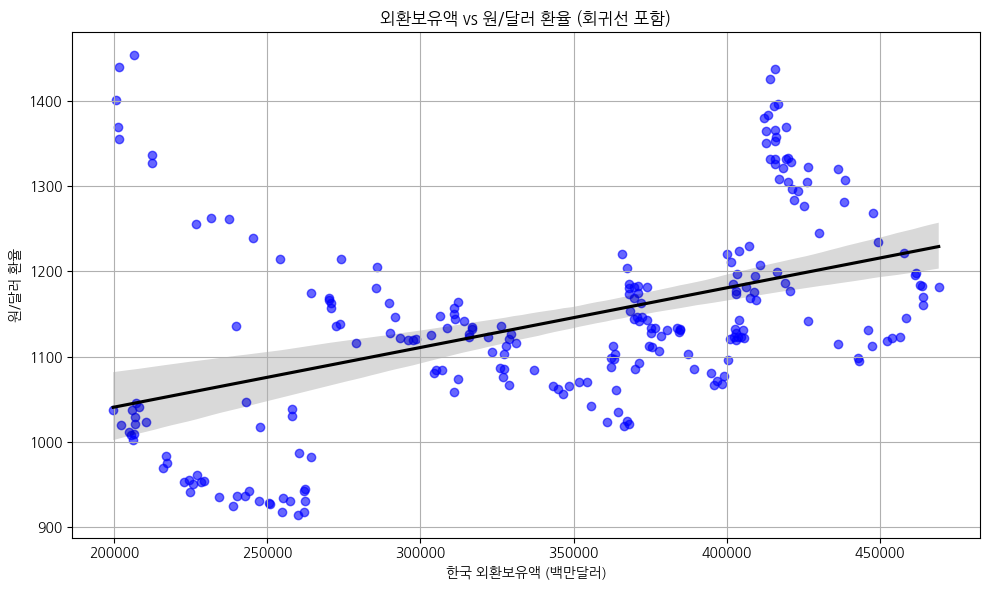

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merged,
    x="한국 외환 보유액", y="원/달러환율",
    color="blue", scatter_kws={'alpha':0.6}, line_kws={"color": "black"}
)

plt.title("외환보유액 vs 원/달러 환율 (회귀선 포함)")
plt.xlabel("한국 외환보유액 (백만달러)")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.tight_layout()
plt.show()

|위치	|시기 (대략)	|특이점 설명|
|-----|--------|------------|
|좌상단	|2009년 전후|	외환보유액은 상대적으로 낮은데 환율이 비정상적으로 높음 → 2008 글로벌 금융위기 여파로 환율 급등, 하지만 외환보유액 축적은 아직 덜 됨|
|좌하단	|2007~2008년 초| 외환보유액도 낮고 환율도 낮음→ 위기 직전 시기, 상대적 안정기|
|우상단	|2022~2023년	|외환보유액은 많은데 환율이 높음 → 정책적 방어에도 **글로벌 요인(VIX, 금리차 등)**으로 환율이 고점 유지되는 예외적 구간|

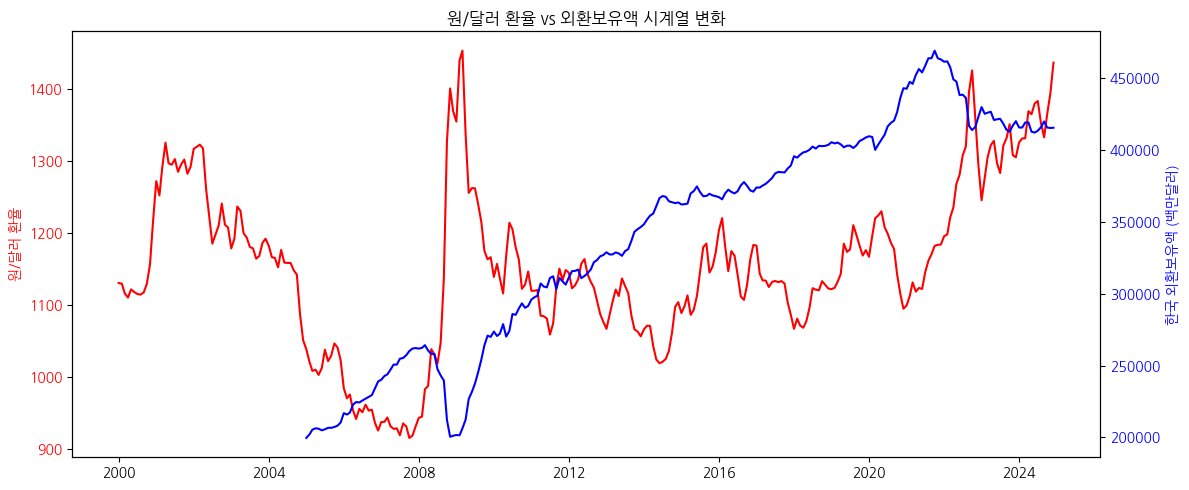

In [11]:
plt.figure(figsize=(12, 5))

# 축1: 원/달러 환율
ax1 = plt.gca()
ax1.plot(df_merged["TIME"], df_merged["원/달러환율"], color="red", label="원/달러 환율")
ax1.set_ylabel("원/달러 환율", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# 축2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_merged["TIME"], df_merged["한국 외환 보유액"], color="blue", label="외환보유액")
ax2.set_ylabel("한국 외환보유액 (백만달러)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("원/달러 환율 vs 외환보유액 시계열 변화")
plt.xlabel("연도")
plt.tight_layout()
plt.show()

### **[가설 4] 결론**

- **상관계수 0.456** → 중간 정도의 양의 상관관계

  ➔ 예상과 다르게, 외환보유액이 많다고 환율이 반드시 낮아지는 것 아님

- 왜?

  외환보유액은 선제적 방어 수단이기 때문에, 환율이 급등한 뒤 보유액이 늘어나는 반응성 특징이 있음.

  또한, 외국인 투자자금 유입 등 외부 요인에 의해 환율과 외환보유액이 동시에 움직일 수도 있음.


그렇다면 경제심리지수(기대감)이 낮을 수록 외환보유액이 방어적 수단으로 증가하는가?

## **[가설 4-1] 경제심리지수가 낮아질수록 외환보유액은 증가할 것이다**

In [28]:
# 시간 순 정렬
df_sorted = df_merged.sort_values('TIME')
correlation = df_merged[['경제 심리 지수', '한국 외환 보유액']].corr().iloc[0, 1]
print(f'경제심리지수와 외환보유액 간 상관계수: {correlation:.3f}')

경제심리지수와 외환보유액 간 상관계수: -0.349


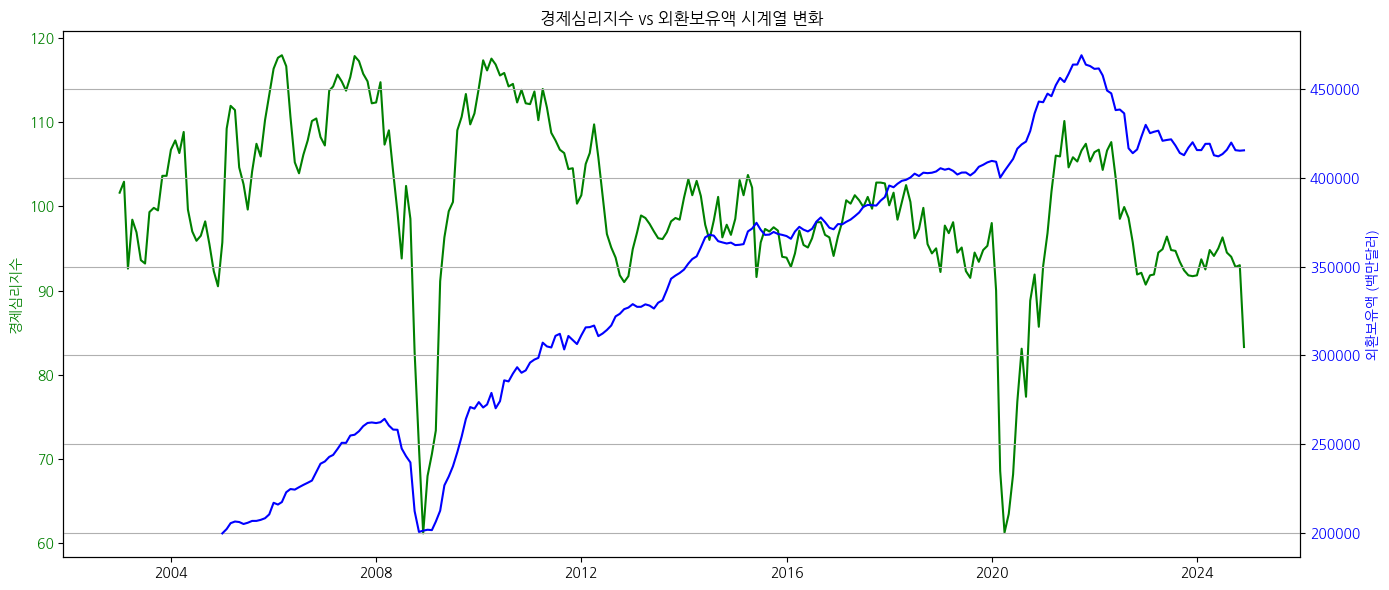

In [29]:
# --- 시각화 ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# 경제심리지수 (좌측 축)
ax1.plot(df_sorted['TIME'], df_sorted['경제 심리 지수'], color='green', label='경제심리지수')
ax1.set_ylabel('경제심리지수', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 외환보유액 (우측 축)
ax2 = ax1.twinx()
ax2.plot(df_sorted['TIME'], df_sorted['한국 외환 보유액'], color='blue', label='외환보유액')
ax2.set_ylabel('외환보유액 (백만달러)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('경제심리지수 vs 외환보유액 시계열 변화')
plt.grid(True)
plt.tight_layout()
plt.show()

|구간	|경제심리지수 추이	|외환보유액 반응	|해석 요약|
|-----|----------------|-------------|----------|
|2008 금융위기	|급락	|증가 (방어적 확충)|	위기 이후 대응으로 외환보유 확대
|2020 팬데믹	|급락	|증가 (빠른 회복)	|실물경제 불안 속 방어 강화
|2010~2019	|점진적 하락	|지속적 증가|	구조적 외환보유 전략 영향
|2022~2023|	하락	|감소	|고환율, 글로벌 불안 등 외부요인이 더 강하게 작용

### **[가설 4-1] 결론**

- 상관계수 -0.349 로 약한 음의 상관관계

► 경제심리가 나빠질 때 외환보유액이 증가하는 경우도 있으나, 이는 정책적 대응이나 외부 환경의 영향일 가능성이 큼

따라서, 경제심리지수만으로 외환보유액의 흐름을 설명하기엔 부족

### ⭐️ **가설 4 전체 정리**

✔️**[가설 4-0]**

**“외환보유액이 높을수록 원/달러 환율은 하락할 것이다.”**

  - 예상과 달리, **중간 정도의 양의 상관관계(0.456)**가 나타남
  
  - 즉, 외환보유액이 높다고 해서 환율이 반드시 하락하지는 않음
  
  - 환율이 급등한 뒤에 보유액이 증가하는 ‘사후 대응’ 형태가 많음

  - 환율 급등 → 외환보유액 증가(사후 대응) 패턴 구간


  |시기	|환율 추이	|외환보유액 추이	|해석|
  |------|-------|---------|--------|
|2008~2009년 글로벌 금융위기	|급등 (~1500원대)	|초기 낮았다가 이후 빠르게 증가	|위기 발생 → 방어목적으로 보유액 축적|
|2020년 코로나 팬데믹 초기	|급등 (~1300원대)	|일시적으로 증가	|외환시장의 불확실성 → 보유액 축적 및 안정화|
|2022~2023년 금리 급등 + 지정학 리스크	|환율 급등 (~1400원 돌파)	|일정 기간 감소 후 재확보 시도|	방어 목적 보유액 사용 + 평가손 반영 이후 재축적 노력|

<br>

✔️**[가설 4-1]**

**“경제심리지수가 낮아질수록 외환보유액이 증가할 것이다.”**

  - 약한 음의 상관관계(-0.349)

  - 위기 시기(2008, 2020 등)엔 경제 불안에 대응한 외환보유액 증가 경향

  - 하지만 최근(2022~2023년)엔 보유액 감소도 있었음

  - 즉, 경제심리만으로 보유액 변화를 설명하기는 어려움

► 외환보유액이 많을수록 환율은 낮아진다”는 가설과 달리, 실제 데이터에서는 외환보유액이 환율 급등 이후에 증가하는 ‘사후 대응’ 형태로 작동하는 경우가 많았다.
즉, 환율 안정화 목적의 대응 수단으로 외환보유액이 사용되었으며, 이는 정책적 대응의 결과로 해석할 수 있다.

## **[가설 5] 외환보유액과 환율은 정책적 이벤트에 영향을 받는다.**

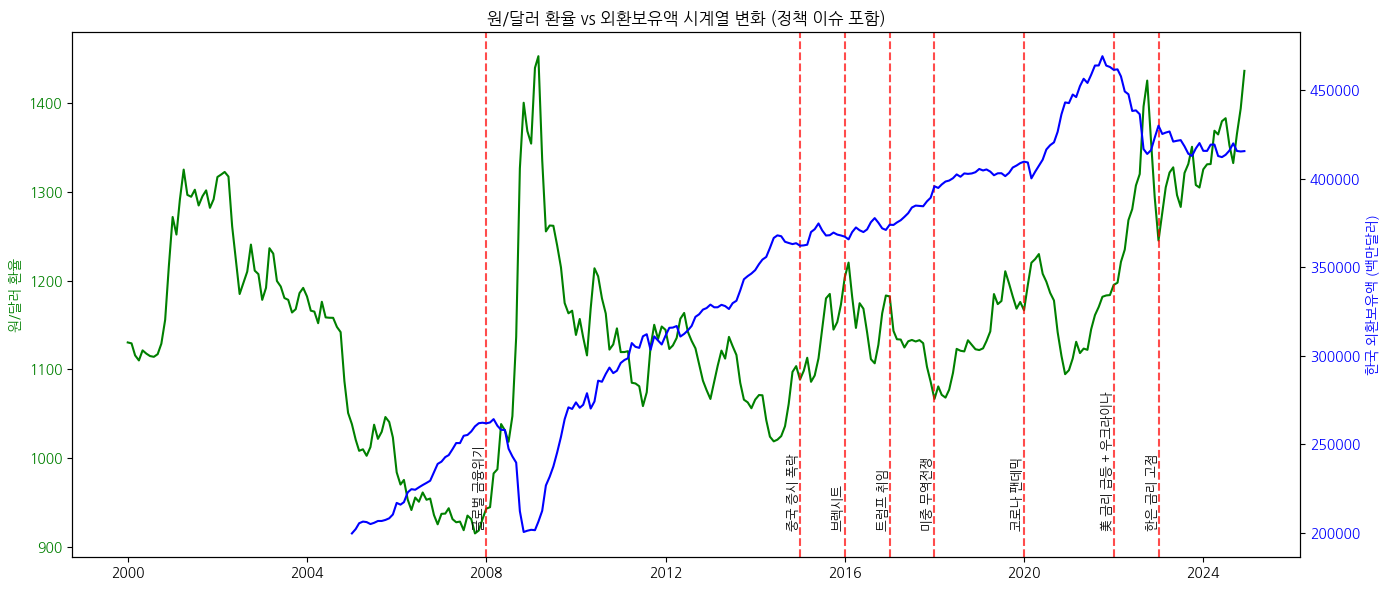

In [15]:
plt.figure(figsize=(14, 6))

# 축 1: 원/달러 환율
ax1 = plt.gca()
ax1.plot(df_merged["TIME"], df_merged["원/달러환율"], color="green", label="원/달러 환율")
ax1.set_ylabel("원/달러 환율", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# 축 2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_merged["TIME"], df_merged["한국 외환 보유액"], color="blue", label="한국 외환보유액")
ax2.set_ylabel("한국 외환보유액 (백만달러)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# 정책 이벤트
event_lines = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "美 금리 급등 + 우크라이나",
    "2023": "한은 금리 고점"
}

# y축 최상단값 추정 (글씨 위치 잡기용)
y_pos = ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.05

for year, label in event_lines.items():
    date = pd.to_datetime(f"{year}-01-01")
    ax1.axvline(date, color='red', linestyle='--', alpha=0.7)

    # 아래쪽에 가로쓰기, 회전 없이
    ax1.text(date, y_pos, label,
             rotation=90, fontsize=9, color='black',
             ha='right', va='bottom')  # 수평정렬, 수직정렬

# 제목 및 마무리
plt.title("원/달러 환율 vs 외환보유액 시계열 변화 (정책 이슈 포함)")
plt.tight_layout()
plt.show()

| 시기            | 주요 이벤트                | 원/달러 환율 (초록)       | 외환보유액 (파랑)         | 해석 요약 |
|------------------|-----------------------------|-----------------------------|-----------------------------|------------|
| **2008년**      | 글로벌 금융위기           | 급등 (~1500원)             | 일시적 하락 후 급반등     | 금융위기 불안 → 환율 급등, 이후 외화 방어 목적의 보유 확대 |
| **2015년**      | 중국 증시 폭락            | 소폭 상승                  | 큰 영향 없음               | 아시아 불안에 따른 심리 위축 반영 |
| **2016년**      | 브렉시트                   | 영향 크지 않음             | 안정적 증가세 지속         | 유럽발 충격이나 외환시장엔 제한적 |
| **2017년**      | 트럼프 취임               | 보합 또는 소폭 상승        | 외환보유 증가 지속         | 정책 불확실성 반영, 환율 영향 미미 |
| **2018년**      | 미중 무역전쟁             | 점진적 상승                | 완만한 증가                | 무역 불확실성 반영으로 환율 점진적 상승 |
| **2020년**      | 코로나 팬데믹             | 급등 (~1300원대)           | 보유액 급증                | 위기 시기 외환방어·안정 목적 확충 |
| **2022년**      | 美 금리 급등 + 우크라이나 | 환율 급등 (~1400원 이상)   | 외환보유액 감소 후 회복    | 안전자산 회귀+원화 약세에 따른 급등, 보유액 사용 시점 |
| **2023년**      | 한은 기준금리 고점        | 하락 후 재반등              | 소폭 감소                   | 금리정책 기대감이 반영되나, 하반기 환율 재상승 |


**❗️공통된 특이점 : 환율 상승 + 외환보유액 하락**

지금까지 위기상황(환율상승/원화약세)에서 외환보유액이 증가하는 것을 볼 수 있었음. 하지만 세 시기는 특이해보임.

|시기|	환율 변화	|외환보유액 변화	|특징 요약|
|---|--------|------------------|-------|
|2008 글로벌 금융위기|	급등 (원화가치 폭락)|	급락 (외환시장 개입)	|위기 초반 외환유출과 방어 개입으로 보유액 감소|
|2022 美 금리 급등 + 우크라이나	|급등 (달러 초강세 + 지정학 리스크)	|하락 (보유액 활용 + 평가 손실)|	고금리·전쟁 복합 요인, 방어 목적 외환 사용|
|2023년 고금리 피크|	재상승	|소폭 감소	|외자 유입 둔화 + 고환율 유지로 방어 부담 증가|

<br>

하지만!! **2023년 이후는 조금 다름**

환율은 살짝 반락했다가 다시 재상승 (2024 들어서도 고공행진)

외환보유액은 완전히 회복되지는 않음, 4100~4200억 달러 수준에서 횡보

→ **환율도 계속 상승 외환보유액은 회복하지 못함**

<br>

► 즉, 보유액이 회복세로 전환되지 않은 이유 추정

  - 글로벌 달러 강세가 계속됨 → 방어 부담 지속

  - 무역수지 개선에도 불구하고 외자 유입 둔화

  - 한은이 빠르게 외환보유액을 다시 쌓을 여유가 없음 → 신중한 방어 지속 중

**결론**

결국 일반적인 패턴은 환율이 상승할 때 중앙은행이 외환보유액을 적절히 조절하면서 시장에 개입하게 됨.

→ 결과적으로 환율 안정 + 보유액 감소 → 이후 보유액 점진적 회복

🥲 2023년이후로는 외환보유액과 환율모두 회복하지 못하고 있음

- 환율 : 상승 후 높은 수준 지속
- 외환보유액 : 감소 이후 회복 정체기
- 외자 유입 : 유입둔화
- 방어정책(중앙은행개입) : 효과 제한적

**"왜 이런현상이 나타났을까?"**

1. 미국 고금리 장기화 → 달러 강세 지속 → 환율 고공 유지

2. 무역수지 흑자에도 불구하고 외자유입이 약함 → 투자심리 회복이 더딤

3. 한국의 금리 인상 여력이 제한적 → 금리 차 축소 어려움 → 환율 하락 제약

4. 한은의 외환시장 개입도 점진적 → 공격적 방어보다는 안정적 관리 지향



### **[가설 5] 결론**

► 외환보유액과 환율은 거시적 정책 이벤트(금리, 전쟁, 개입 등)의 영향을 받는다.

  정책의 속도·강도·국제 정세와의 조합에 따라 그 회복 양상은 달라짐.

  특히 최근에는 정책 대응의 한계가 뚜렷하게 드러나고 있음.

## **[가설 6] 외국인 투자금액이 늘면 외환보유액이 증가한다.**

In [17]:
corr_2 = df_merged[["외국인 투자 금액", "한국 외환 보유액"]].corr().iloc[0, 1]
print(f"외국인 투자 금액과 외환보유액 간 상관계수: {corr_2:.3f}")

외국인 투자 금액과 외환보유액 간 상관계수: 0.769


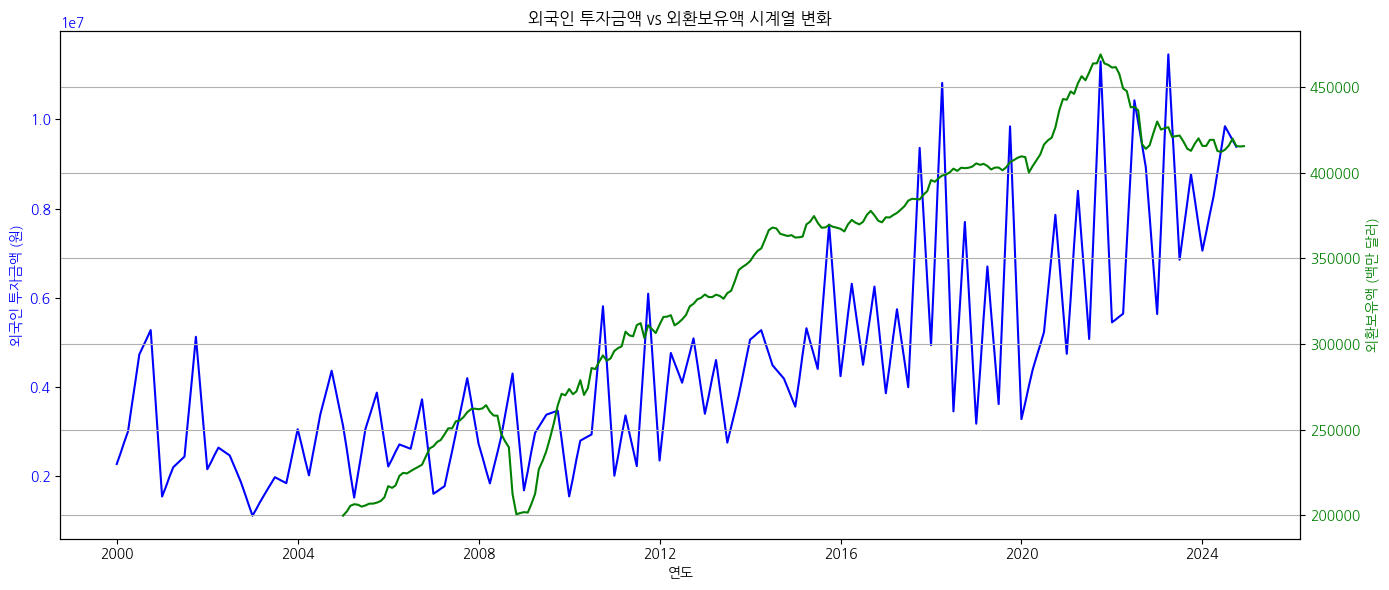

In [16]:
import matplotlib.pyplot as plt

# 데이터프레임 복사 및 시간 변환
df_plot = df_merged.copy()
df_plot = df_plot.reset_index()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))

# 시각화
plt.figure(figsize=(14, 6))

# 축 1: 외국인 투자금액
ax1 = plt.gca()
ax1.plot(df_plot["TIME"], df_plot["외국인 투자 금액"], color="blue", label="외국인 투자금액")
ax1.set_ylabel("외국인 투자금액 (원)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 축 2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["한국 외환 보유액"], color="green", label="한국 외환보유액")
ax2.set_ylabel("외환보유액 (백만 달러)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# x축 설정
ax1.set_xlabel("연도")
plt.title("외국인 투자금액 vs 외환보유액 시계열 변화")
plt.grid(True)
plt.tight_layout()
plt.show()

그래프에서 외환보유액(초록색)은 전체적으로 꾸준한 상승세를 보이며,

외국인 투자금액(파란색)은 변동성이 크지만, 장기적으로는 우상향

➔ 즉 외국인 투자 유입이 직접적인 외환보유액 확대 요인으로 작용

? 그렇다면 원화가 약세할수록 외국인 투자 증가하고 외국인 투자 증가하면 외환보유액이 느는 수순?

→ 외환보유액이 증가한다고 환율이 하락, 즉 원화가 강세하지 않는 것을 알 수 있음.

### **[가설6] 결론**

외국인 투자가 외화보유액에 직접적인 영향을 미친다.

* 외국인 투자금은 외환보유액에 직접적인 영향을 미치며, 외환보유액이 단순히 환율 방어 수단이 아니라, 외자유입의 결과물이라는 측면도 중요하게 봐야 함

* 환율 → 외국인 투자 → 외환보유액 순서의 흐름만이 아니라, 외국인 투자 → 외환보유액 직접 경로도 작동함